# IWMI DIWASA Evaporation, Transpiration, Interception

* **Products used:** 
[iwmi_evaporation_monthly](https://explorer.digitalearth.africa/products/iwmi_evaporation_monthly), [iwmi_interception_monthly](https://explorer.digitalearth.africa/products/iwmi_interception_monthly), [iwmi_transpiration_monthly](https://explorer.digitalearth.africa/products/iwmi_transpiration_monthly)

## Background



***

## Description

This notebook will cover following topics:

1.

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import datacube
import geopandas as gpd
from odc.geo.geom import Geometry

from deafrica_tools.plotting import display_map
from deafrica_tools.areaofinterest import define_area

### Connect to the datacube

Connect to the datacube so we can access DE Africa data.

In [2]:
dc = datacube.Datacube(app="IWMI_DIWASA")

### List measurements

In [3]:
product = "iwmi_evaporation_monthly"

In [4]:
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,add_offset,scale_factor
measurement,,,,,,,,
data,data,int16,mm/month,-9999,[evaporation],NaN,NaN,0.1


### Analysis parameters

The following cell sets the parameters, which define the area of interest to conduct the analysis over.
#### Select location
To define the area of interest, there are two methods available:

1. By specifying the latitude, longitude, and buffer, or separate latitude and longitude buffers, this method allows you to define an area of interest around a central point. You can input the central latitude, central longitude, and a buffer value in degrees to create a square area around the center point. For example, `lat = 10.338`, `lon = -1.055`, and `buffer = 0.1` will select an area with a radius of 0.1 square degrees around the point with coordinates `(10.338, -1.055)`. 
    
    Alternatively, you can provide separate buffer values for latitude and longitude for a rectangular area. For example, `lat = 10.338`, `lon = -1.055`, and `lat_buffer = 0.1` and`lon_buffer = 0.08` will select a rectangular area extending 0.1 degrees north and south, and 0.08 degrees east and west from the point `(10.338, -1.055)`.

   For reasonable loading times, set the buffer as `0.1` or lower.

3. By uploading a polygon as a `GeoJSON or Esri Shapefile`. If you choose this option, you will need to upload the geojson or ESRI shapefile into the Sandbox using Upload Files button <img align="top" src="../Supplementary_data/upload_files_icon.png"> in the top left corner of the Jupyter Notebook interface. ESRI shapefiles must be uploaded with all the related files `(.cpg, .dbf, .shp, .shx)`. Once uploaded, you can use the shapefile or geojson to define the area of interest. Remember to update the code to call the file you have uploaded.

To use one of these methods, you can uncomment the relevant line of code and comment out the other one. To comment out a line, add the `"#"` symbol before the code you want to comment out. By default, the first option which defines the location using latitude, longitude, and buffer is being used.

**If running the notebook for the first time**, keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.

**To run the notebook for a different area**, make sure data is available for the chosen area using the [DEAfrica Explorer](https://explorer.digitalearth.africa).

In [5]:
# Method 1: Specify the latitude, longitude, and buffer)
aoi = define_area(lat=-19.3, lon=22.8, buffer=1)

# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

In [6]:
display_map(x=lon_range, y=lat_range)

## Load dataset using `dc.load()`

In [7]:
query = {
    'x': (lon_range),
    'y': (lat_range),
    'time':('2020-01-01', '2020-12-31'),
    'output_crs': 'EPSG:4326',
    'resolution': (-0.00952, 0.00952)}

ds_e = dc.load(product=product,
                group_by="solar_day",
                **query)

ds_e

<xarray.Dataset> Size: 1MB
Dimensions:      (time: 12, latitude: 211, longitude: 211)
Coordinates:
  * time         (time) datetime64[ns] 96B 2020-01-01 2020-02-01 ... 2020-12-01
  * latitude     (latitude) float64 2kB -18.3 -18.31 -18.32 ... -20.29 -20.3
  * longitude    (longitude) float64 2kB 21.8 21.81 21.82 ... 23.78 23.79 23.8
    spatial_ref  int32 4B 4326
Data variables:
    data         (time, latitude, longitude) int16 1MB 16 31 65 52 ... 52 56 53
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

> **⚠️ Note:**  0.1 scale factor

#### Visualise evaporation (E)


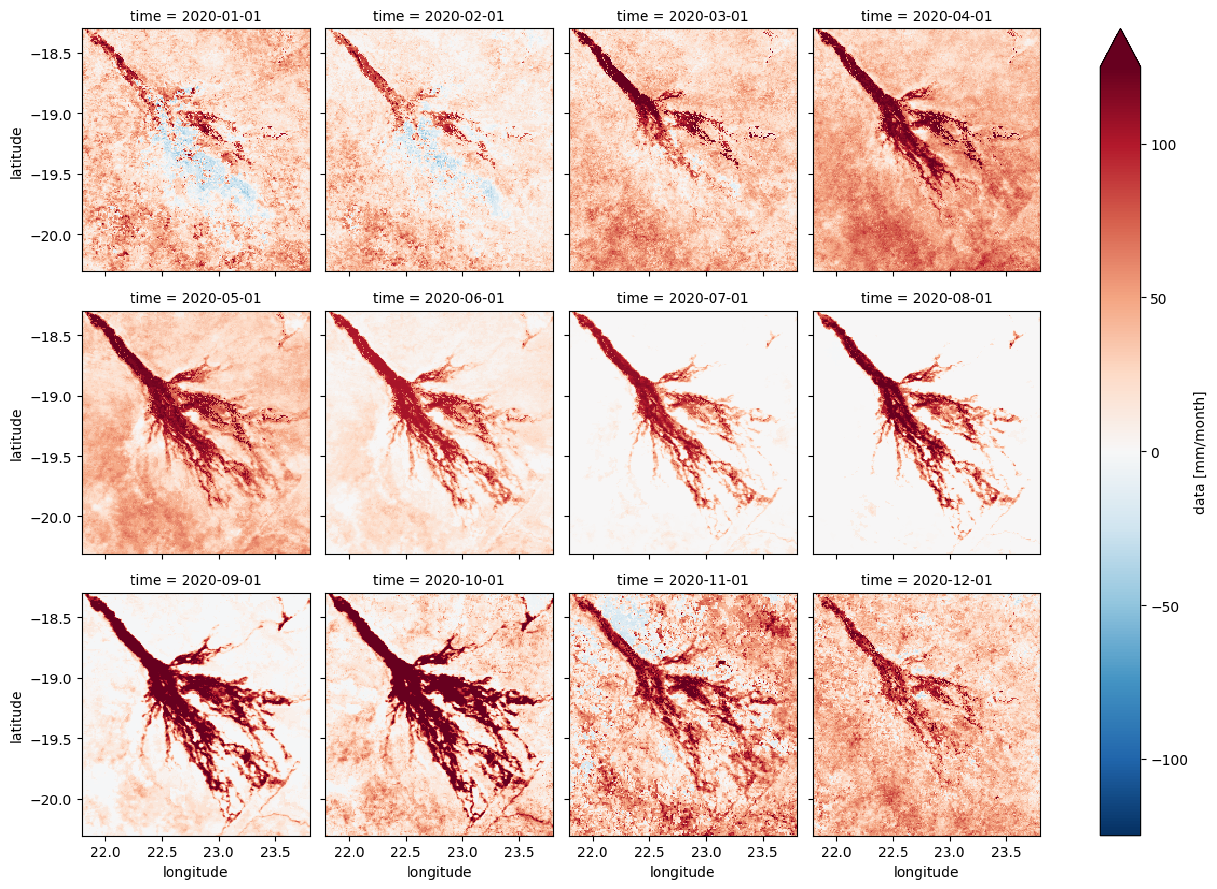

In [8]:
(ds_e['data']).plot(robust=True, col="time", col_wrap=4);

#### Visualise transpiration (T)

In [9]:
query = {
    'x': (lon_range),
    'y': (lat_range),
    'time':('2020-01-01', '2020-12-31'),
    'output_crs': 'EPSG:4326',
    'resolution': (-0.00952, 0.00952)}

ds_t = dc.load(product='iwmi_transpiration_monthly',
                group_by="solar_day",
                **query)

ds_t

<xarray.Dataset> Size: 1MB
Dimensions:      (time: 12, latitude: 211, longitude: 211)
Coordinates:
  * time         (time) datetime64[ns] 96B 2020-01-01 2020-02-01 ... 2020-12-01
  * latitude     (latitude) float64 2kB -18.3 -18.31 -18.32 ... -20.29 -20.3
  * longitude    (longitude) float64 2kB 21.8 21.81 21.82 ... 23.78 23.79 23.8
    spatial_ref  int32 4B 4326
Data variables:
    data         (time, latitude, longitude) int16 1MB 48 45 37 40 ... 23 24 28
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

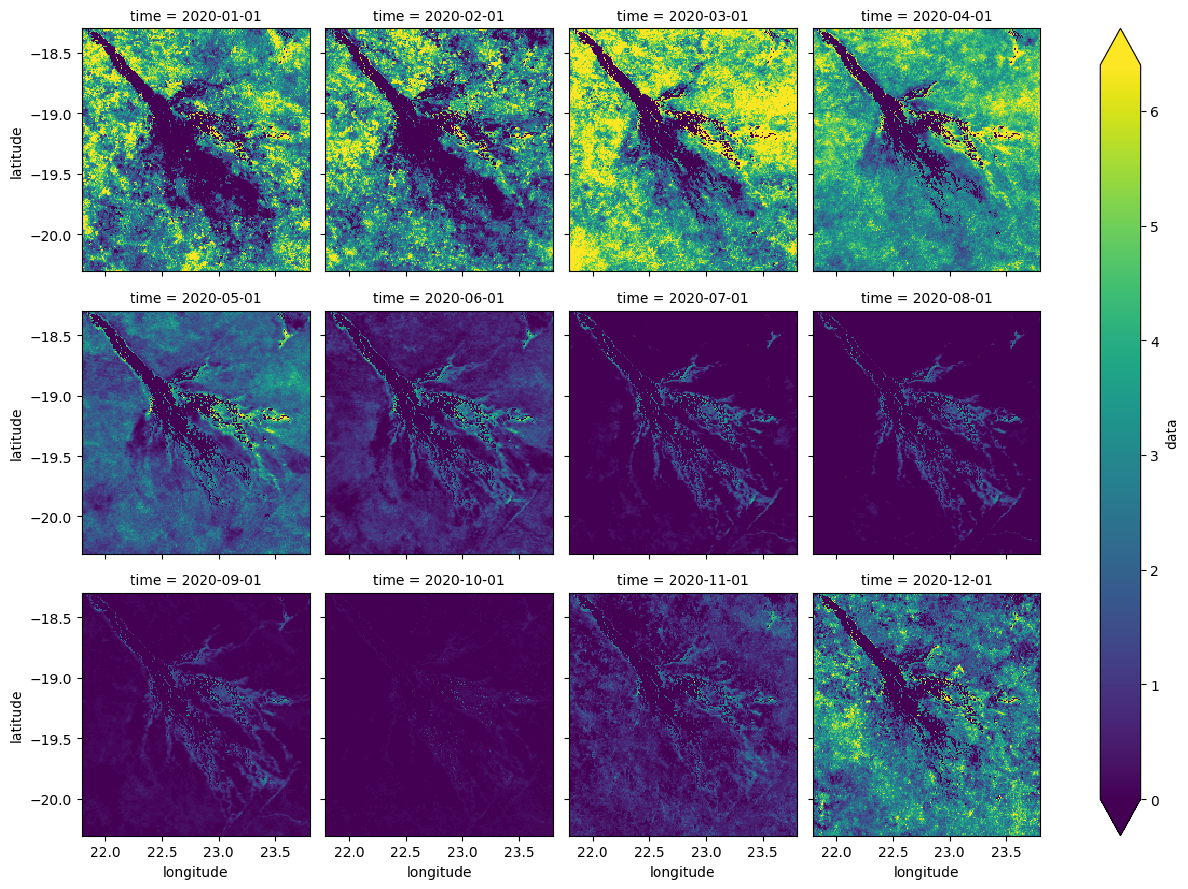

In [10]:
(ds_t['data']*0.1).plot(robust=True, col="time", col_wrap=4);

#### Visualise interception (I)

In [11]:
query = {
    'x': (lon_range),
    'y': (lat_range),
    'time':('2020-01-01', '2020-12-31'),
    'output_crs': 'EPSG:4326',
    'resolution': (-0.00952, 0.00952)}

ds_i = dc.load(product='iwmi_interception_monthly',
                group_by="solar_day",
                **query)

ds_i

<xarray.Dataset> Size: 1MB
Dimensions:      (time: 12, latitude: 211, longitude: 211)
Coordinates:
  * time         (time) datetime64[ns] 96B 2020-01-01 2020-02-01 ... 2020-12-01
  * latitude     (latitude) float64 2kB -18.3 -18.31 -18.32 ... -20.29 -20.3
  * longitude    (longitude) float64 2kB 21.8 21.81 21.82 ... 23.78 23.79 23.8
    spatial_ref  int32 4B 4326
Data variables:
    data         (time, latitude, longitude) int16 1MB 103 93 101 ... 114 96 100
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

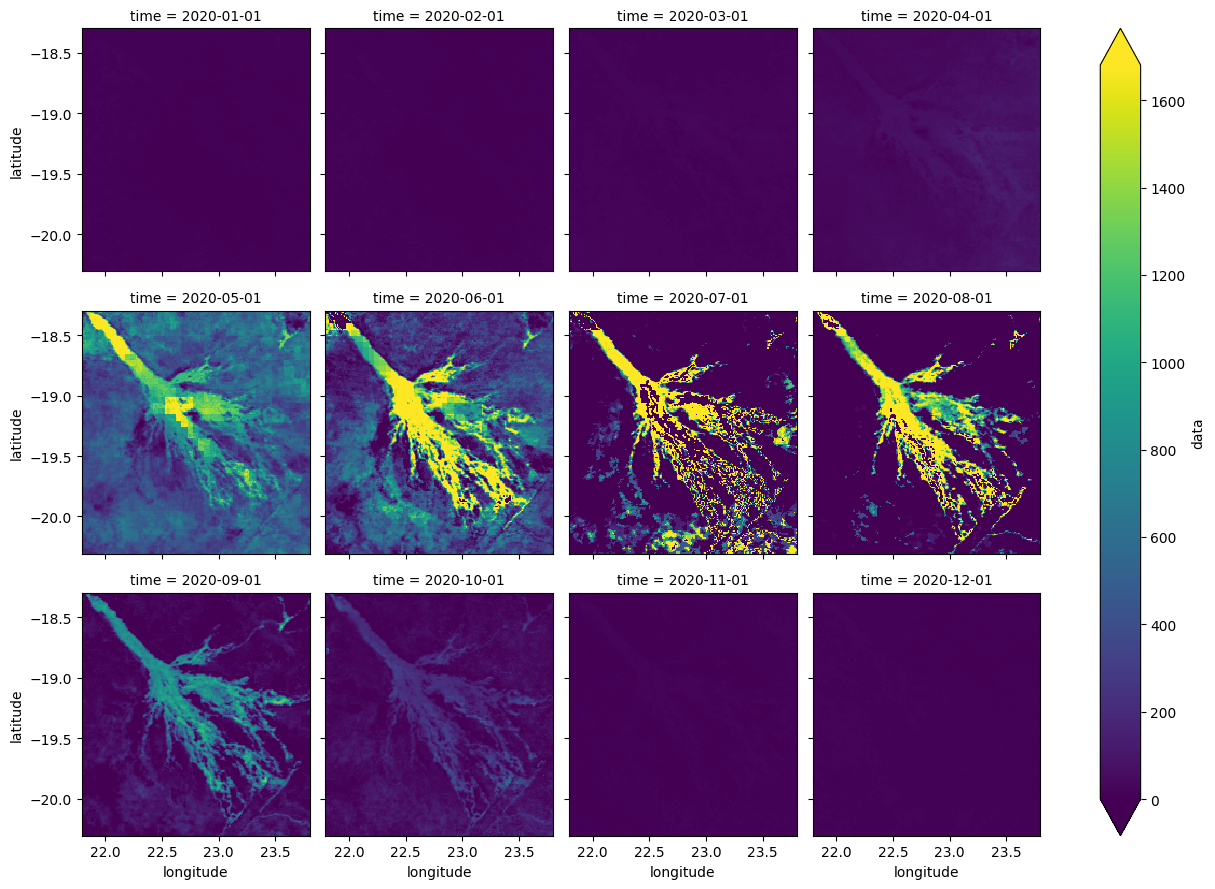

In [12]:
(ds_i['data']*0.1).plot(robust=True, col="time", col_wrap=4);

---

## Additional information

<b> License </b> The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0).

Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

<b> Contact </b> If you need assistance, please post a question on the [DE Africa Slack channel](https://digitalearthafrica.slack.com/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).

If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

<b> Compatible datacube version </b>

In [13]:
print(datacube.__version__)

1.8.20


**Last Tested:**

In [14]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-10-09'